In [80]:
import numpy as np 
import pandas as pd
import torch

# 1. Loading Data

In [81]:
X = pd.read_csv("./Xtrain_hgcGIrA.csv")
X.head()

,date,train,way,station,hour,composition,p1q0,p2q0,p3q0,p0q1,p0q2,p0q3
0,2019-01-07,1,0,AD,06:00:00,2,NaN,NaN,NaN,0.201,0.138,0.091
1,2019-01-08,1,0,AD,06:00:00,2,NaN,NaN,NaN,0.204,0.152,0.106
2,2019-01-10,1,0,AD,06:00:00,2,NaN,NaN,NaN,0.213,0.153,0.111
3,2019-01-11,1,0,AD,06:00:00,2,NaN,NaN,NaN,0.213,0.152,0.108
4,2019-01-14,1,0,AD,06:00:00,2,NaN,NaN,NaN,0.210,0.147,0.096


In [82]:
y = pd.read_csv("./Ytrain_yL5OjS4.csv")
y.head()

,Unnamed: 0,p0q0
0,1,0.216
1,2,0.216
2,3,0.227
3,4,0.229
4,5,0.225


In [83]:
y = y.drop(['Unnamed: 0'], axis=1)

In [84]:
y.head()

,p0q0
0,0.216
1,0.216
2,0.227
3,0.229
4,0.225


In [85]:
y.shape

(31119, 1)

In [86]:
any(X["hour"] == "11:00:00")

True

In [87]:
# shape of the data 
X.shape

(31119, 12)

In [88]:
X.head()

,date,train,way,station,hour,composition,p1q0,p2q0,p3q0,p0q1,p0q2,p0q3
0,2019-01-07,1,0,AD,06:00:00,2,NaN,NaN,NaN,0.201,0.138,0.091
1,2019-01-08,1,0,AD,06:00:00,2,NaN,NaN,NaN,0.204,0.152,0.106
2,2019-01-10,1,0,AD,06:00:00,2,NaN,NaN,NaN,0.213,0.153,0.111
3,2019-01-11,1,0,AD,06:00:00,2,NaN,NaN,NaN,0.213,0.152,0.108
4,2019-01-14,1,0,AD,06:00:00,2,NaN,NaN,NaN,0.210,0.147,0.096


In [89]:
X_test = pd.read_csv("./Xtest.csv")

In [90]:
X = pd.concat([X, X_test], axis=0)
X.reset_index(drop=True, inplace=True)
X

,date,train,way,station,hour,composition,p1q0,p2q0,p3q0,p0q1,p0q2,p0q3
0,2019-01-07,1,0,AD,06:00:00,2,NaN,NaN,NaN,0.201,0.138,0.091
1,2019-01-08,1,0,AD,06:00:00,2,NaN,NaN,NaN,0.204,0.152,0.106
2,2019-01-10,1,0,AD,06:00:00,2,NaN,NaN,NaN,0.213,0.153,0.111
3,2019-01-11,1,0,AD,06:00:00,2,NaN,NaN,NaN,0.213,0.152,0.108
4,2019-01-14,1,0,AD,06:00:00,2,NaN,NaN,NaN,0.210,0.147,0.096
...,...,...,...,...,...,...,...,...,...,...,...,...
44866,2019-07-03,9,0,BE,08:00:00,2,0.121,0.145,0.15715,0.071,0.095,NaN
44867,2019-07-04,9,0,BE,08:00:00,2,0.144,0.139,0.15300,0.079,0.102,NaN
44868,2019-07-05,9,0,BE,08:00:00,2,0.128,0.137,0.12700,0.072,0.089,NaN
44869,2019-05-28,9,0,BE,08:00:00,2,0.164,0.187,0.15500,0.100,0.130,NaN


# 2. Cleaning and Preparing data

In [91]:
C = True

for i in range(X["composition"].shape[0]):
    if not X["composition"][i] == 2:
        C = False
        break

C

False

In [92]:
D = True

for i in range(X["way"].shape[0]):
    if not X["way"][i] == 0:
        D = False
        break

D

True

In [93]:
X = X.drop( ["way"], axis=1)
X.head()

,date,train,station,hour,composition,p1q0,p2q0,p3q0,p0q1,p0q2,p0q3
0,2019-01-07,1,AD,06:00:00,2,NaN,NaN,NaN,0.201,0.138,0.091
1,2019-01-08,1,AD,06:00:00,2,NaN,NaN,NaN,0.204,0.152,0.106
2,2019-01-10,1,AD,06:00:00,2,NaN,NaN,NaN,0.213,0.153,0.111
3,2019-01-11,1,AD,06:00:00,2,NaN,NaN,NaN,0.213,0.152,0.108
4,2019-01-14,1,AD,06:00:00,2,NaN,NaN,NaN,0.210,0.147,0.096


In [94]:
X["train"].unique()

array([ 1, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,  2, 20, 21, 22, 23, 24,
       25, 26, 27, 28, 29,  3, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39,  4,
       40, 41, 42, 43, 44, 45, 46, 47, 48, 49,  5, 50, 51, 52, 53, 54, 55,
        6,  7,  8,  9], dtype=int64)

In [95]:
X["station"].unique()

array(['AD', 'AI', 'AJ', 'AK', 'AM', 'AT', 'AW', 'AX', 'BB', 'BD', 'BE',
       'AE', 'AL', 'AO', 'AQ', 'BC', 'AB', 'AN', 'AS', 'BF', 'BG', 'BH',
       'AV', 'AF', 'AP', 'AZ', 'AA', 'AC', 'AG', 'AH', 'AR', 'AU', 'BA',
       'BI', 'BJ', 'AY'], dtype=object)

In [96]:
type(X['date'][1])

str

In [97]:
X.dtypes

date            object
train            int64
station         object
hour            object
composition      int64
p1q0           float64
p2q0           float64
p3q0           float64
p0q1           float64
p0q2           float64
p0q3           float64
dtype: object

In [98]:
X['station'] = pd.factorize(X['station'])[0]
X["station"] = X['station'].astype(float)

In [99]:
X["station"].unique()

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 35.])

In [100]:
X["train"] = X["train"].astype(float)
X["composition"] = X["composition"].astype(float)

In [101]:
X.dtypes

date            object
train          float64
station        float64
hour            object
composition    float64
p1q0           float64
p2q0           float64
p3q0           float64
p0q1           float64
p0q2           float64
p0q3           float64
dtype: object

In [102]:
(X.isna().sum()/X.shape[0]).sort_values(ascending=True)

date           0.000000
train          0.000000
station        0.000000
composition    0.000000
p1q0           0.064741
p0q1           0.102561
hour           0.102739
p2q0           0.131265
p3q0           0.197098
p0q2           0.204988
p0q3           0.307281
dtype: float64

In [103]:
mean_by_train1 = X.groupby('train')['p1q0'].mean()
X['p1q0'] = X['p1q0'].fillna(X['train'].map(mean_by_train1))

mean_by_train2 = X.groupby('train')['p2q0'].mean()
X['p2q0'] = X['p2q0'].fillna(X['train'].map(mean_by_train2))

mean_by_train3 = X.groupby('train')['p3q0'].mean()
X['p3q0'] = X['p3q0'].fillna(X['train'].map(mean_by_train3))

mean_by_train4 = X.groupby('train')['p0q1'].mean()
X['p0q1'] = X['p0q1'].fillna(X['train'].map(mean_by_train4))

mean_by_train5 = X.groupby('train')['p0q2'].mean()
X['p0q2'] = X['p0q2'].fillna(X['train'].map(mean_by_train5))

mean_by_train6 = X.groupby('train')['p0q3'].mean()
X['p0q3'] = X['p0q3'].fillna(X['train'].map(mean_by_train6))

X = X.fillna( value = 0)


In [104]:
(X.isna().sum()/X.shape[0]).sort_values(ascending=True)

date           0.0
train          0.0
station        0.0
hour           0.0
composition    0.0
p1q0           0.0
p2q0           0.0
p3q0           0.0
p0q1           0.0
p0q2           0.0
p0q3           0.0
dtype: float64

In [105]:
X

,date,train,station,hour,composition,p1q0,p2q0,p3q0,p0q1,p0q2,p0q3
0,2019-01-07,1.0,0.0,06:00:00,2.0,0.127839,0.175699,0.174865,0.201,0.138,0.09100
1,2019-01-08,1.0,0.0,06:00:00,2.0,0.127839,0.175699,0.174865,0.204,0.152,0.10600
2,2019-01-10,1.0,0.0,06:00:00,2.0,0.127839,0.175699,0.174865,0.213,0.153,0.11100
3,2019-01-11,1.0,0.0,06:00:00,2.0,0.127839,0.175699,0.174865,0.213,0.152,0.10800
4,2019-01-14,1.0,0.0,06:00:00,2.0,0.127839,0.175699,0.174865,0.210,0.147,0.09600
...,...,...,...,...,...,...,...,...,...,...,...
44866,2019-07-03,9.0,10.0,08:00:00,2.0,0.121000,0.145000,0.157150,0.071,0.095,0.24984
44867,2019-07-04,9.0,10.0,08:00:00,2.0,0.144000,0.139000,0.153000,0.079,0.102,0.24984
44868,2019-07-05,9.0,10.0,08:00:00,2.0,0.128000,0.137000,0.127000,0.072,0.089,0.24984
44869,2019-05-28,9.0,10.0,08:00:00,2.0,0.164000,0.187000,0.155000,0.100,0.130,0.24984


# 3. Data cleaning 

In [106]:
# We check how much number 1 we have in the colomn "composition" 
(X["composition"].sum() - X["composition"].shape[0]*2)  

-11.0

In [107]:
# We can delete it now
X.drop(["composition"], axis=1)

,date,train,station,hour,p1q0,p2q0,p3q0,p0q1,p0q2,p0q3
0,2019-01-07,1.0,0.0,06:00:00,0.127839,0.175699,0.174865,0.201,0.138,0.09100
1,2019-01-08,1.0,0.0,06:00:00,0.127839,0.175699,0.174865,0.204,0.152,0.10600
2,2019-01-10,1.0,0.0,06:00:00,0.127839,0.175699,0.174865,0.213,0.153,0.11100
3,2019-01-11,1.0,0.0,06:00:00,0.127839,0.175699,0.174865,0.213,0.152,0.10800
4,2019-01-14,1.0,0.0,06:00:00,0.127839,0.175699,0.174865,0.210,0.147,0.09600
...,...,...,...,...,...,...,...,...,...,...
44866,2019-07-03,9.0,10.0,08:00:00,0.121000,0.145000,0.157150,0.071,0.095,0.24984
44867,2019-07-04,9.0,10.0,08:00:00,0.144000,0.139000,0.153000,0.079,0.102,0.24984
44868,2019-07-05,9.0,10.0,08:00:00,0.128000,0.137000,0.127000,0.072,0.089,0.24984
44869,2019-05-28,9.0,10.0,08:00:00,0.164000,0.187000,0.155000,0.100,0.130,0.24984


In [108]:
import seaborn as sns

In [109]:
X.dtypes

date            object
train          float64
station        float64
hour            object
composition    float64
p1q0           float64
p2q0           float64
p3q0           float64
p0q1           float64
p0q2           float64
p0q3           float64
dtype: object

In [110]:
X['hour'] = pd.to_datetime(X['hour'], format="%H:%M:%S", errors='coerce')
X['hour'] = X['hour'].dt.time
X['hour'] = X['hour'].apply(lambda x: x.hour + x.minute * 60 + x.second)


In [111]:
X["hour"].unique()

array([ 6.,  7., nan,  8.,  9., 11.])

In [112]:
X.dtypes

date            object
train          float64
station        float64
hour           float64
composition    float64
p1q0           float64
p2q0           float64
p3q0           float64
p0q1           float64
p0q2           float64
p0q3           float64
dtype: object

In [113]:
print(f"6 : {(X['hour'] == 6 ).sum()}")
print(f"7 : {(X['hour'] == 7 ).sum()}")
print(f"8 : {(X['hour'] == 8 ).sum()}")
print(f"9 : {(X['hour'] == 9 ).sum()}")
print(f"11 : {(X['hour'] == 11 ).sum()}")

6 : 7117
7 : 14647
8 : 14398
9 : 4097
11 : 2


In [114]:
X['hour'] = X['hour'].fillna(8.0)

In [115]:
(X.isna().sum()/X.shape[0]).sort_values(ascending=True)

date           0.0
train          0.0
station        0.0
hour           0.0
composition    0.0
p1q0           0.0
p2q0           0.0
p3q0           0.0
p0q1           0.0
p0q2           0.0
p0q3           0.0
dtype: float64

In [116]:
import matplotlib.pyplot as plt

(array([11813., 11410.,  7228.,  5307.,  4819.,  3001.,  1078.,   153.,
           49.,    13.]),
 array([0.    , 0.0934, 0.1868, 0.2802, 0.3736, 0.467 , 0.5604, 0.6538,
        0.7472, 0.8406, 0.934 ]),
 <BarContainer object of 10 artists>)

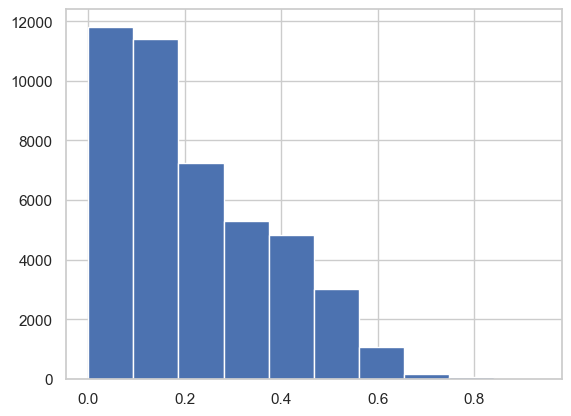

In [117]:
plt.hist(X["p1q0"])

<Axes: xlabel='hour', ylabel='p1q0'>

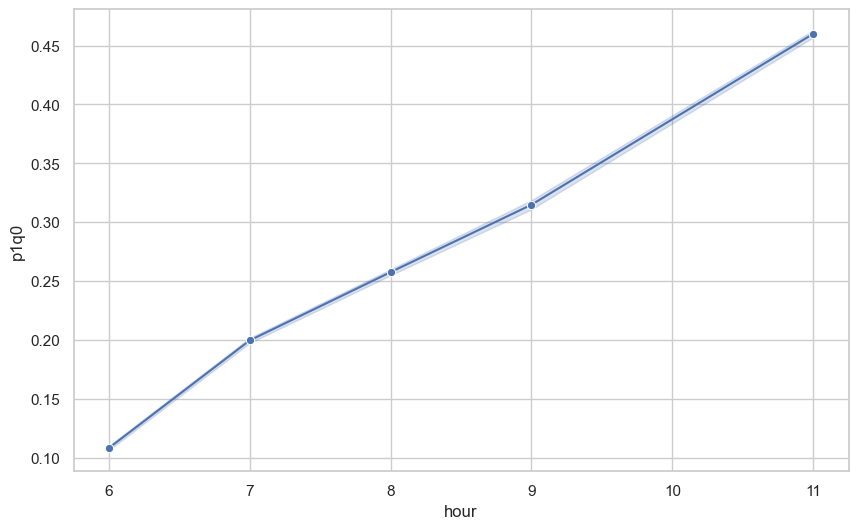

In [118]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.lineplot(x='hour', y='p1q0', data=X, marker='o', color='b')

In [119]:
(X['hour'] == 11.0).sum()

2

In [120]:
X[X['hour'] == 11]

,date,train,station,hour,composition,p1q0,p2q0,p3q0,p0q1,p0q2,p0q3
28760,2019-04-09,6.0,2.0,11.0,2.0,0.463,0.539,0.403,0.4154,0.5190,0.4370
29109,2019-04-09,6.0,8.0,11.0,2.0,0.457,0.401,0.532,0.6130,0.5488,0.4836


<Axes: xlabel='hour', ylabel='p2q0'>

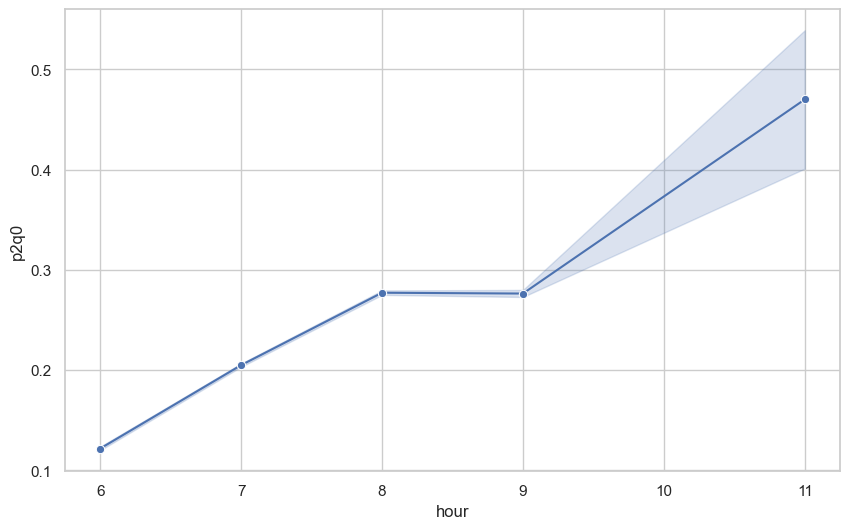

In [121]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.lineplot(x='hour', y='p2q0', data=X, marker='o', color='b')

<Axes: xlabel='hour', ylabel='p3q0'>

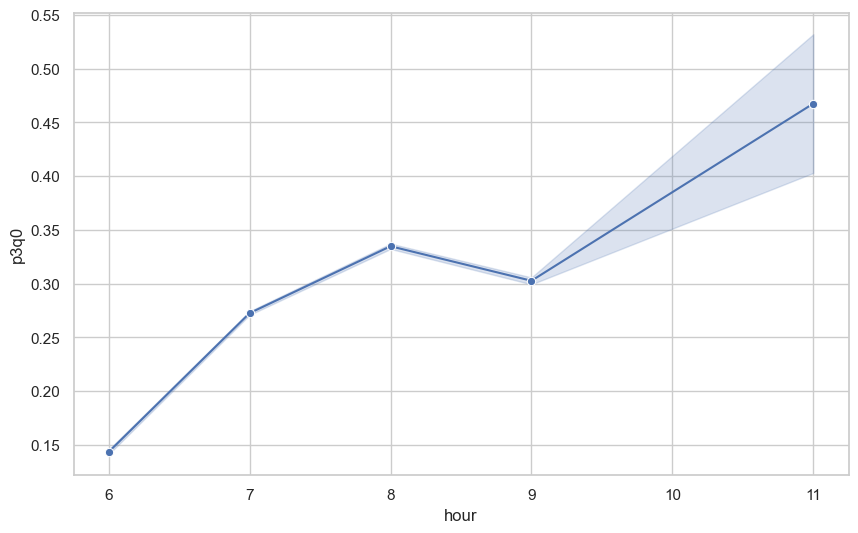

In [122]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.lineplot(x='hour', y='p3q0', data=X, marker='o', color='b')

<Axes: xlabel='hour', ylabel='p0q1'>

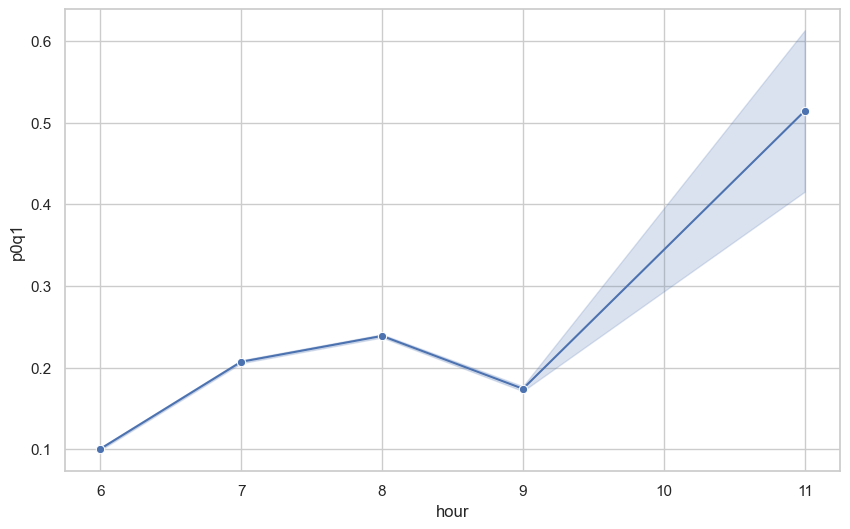

In [123]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.lineplot(x='hour', y='p0q1', data=X, marker='o', color='b')

<Axes: xlabel='hour', ylabel='p0q2'>

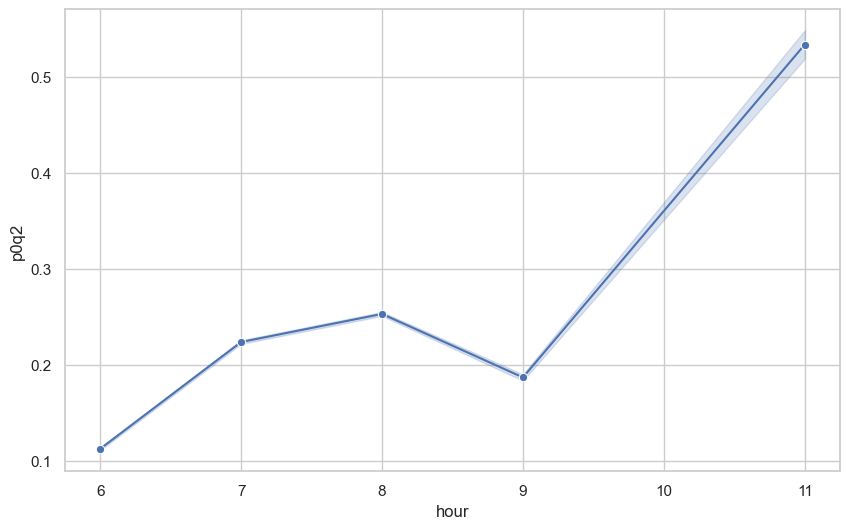

In [124]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.lineplot(x='hour', y='p0q2', data=X, marker='o', color='b')

<Axes: xlabel='hour', ylabel='p0q3'>

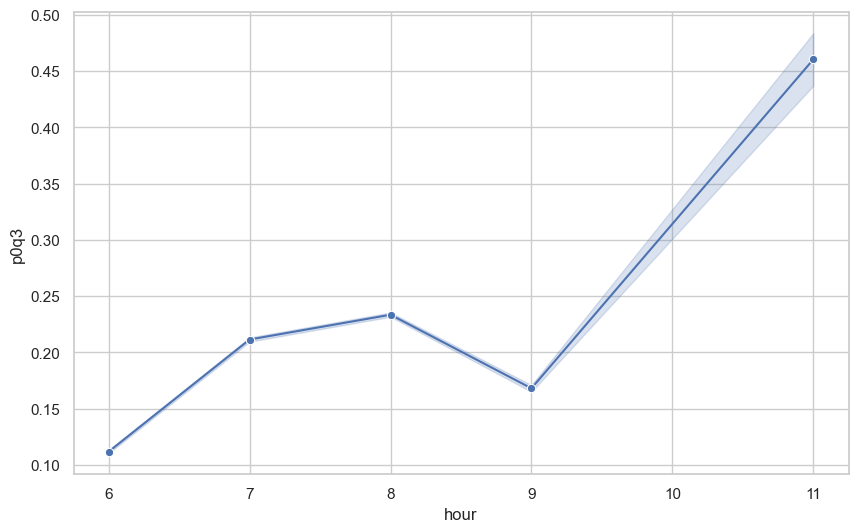

In [125]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.lineplot(x='hour', y='p0q3', data=X, marker='o', color='b')

In [126]:
X

,date,train,station,hour,composition,p1q0,p2q0,p3q0,p0q1,p0q2,p0q3
0,2019-01-07,1.0,0.0,6.0,2.0,0.127839,0.175699,0.174865,0.201,0.138,0.09100
1,2019-01-08,1.0,0.0,6.0,2.0,0.127839,0.175699,0.174865,0.204,0.152,0.10600
2,2019-01-10,1.0,0.0,6.0,2.0,0.127839,0.175699,0.174865,0.213,0.153,0.11100
3,2019-01-11,1.0,0.0,6.0,2.0,0.127839,0.175699,0.174865,0.213,0.152,0.10800
4,2019-01-14,1.0,0.0,6.0,2.0,0.127839,0.175699,0.174865,0.210,0.147,0.09600
...,...,...,...,...,...,...,...,...,...,...,...
44866,2019-07-03,9.0,10.0,8.0,2.0,0.121000,0.145000,0.157150,0.071,0.095,0.24984
44867,2019-07-04,9.0,10.0,8.0,2.0,0.144000,0.139000,0.153000,0.079,0.102,0.24984
44868,2019-07-05,9.0,10.0,8.0,2.0,0.128000,0.137000,0.127000,0.072,0.089,0.24984
44869,2019-05-28,9.0,10.0,8.0,2.0,0.164000,0.187000,0.155000,0.100,0.130,0.24984


In [127]:
(X.isna().sum()/X.shape[0]).sort_values(ascending=True)

date           0.0
train          0.0
station        0.0
hour           0.0
composition    0.0
p1q0           0.0
p2q0           0.0
p3q0           0.0
p0q1           0.0
p0q2           0.0
p0q3           0.0
dtype: float64

In [128]:
X = X.dropna(subset=['hour'])
X.reset_index(drop=True, inplace=True)

In [129]:
(X.isna().sum()/X.shape[0]).sort_values(ascending=True)

date           0.0
train          0.0
station        0.0
hour           0.0
composition    0.0
p1q0           0.0
p2q0           0.0
p3q0           0.0
p0q1           0.0
p0q2           0.0
p0q3           0.0
dtype: float64

In [130]:
X

,date,train,station,hour,composition,p1q0,p2q0,p3q0,p0q1,p0q2,p0q3
0,2019-01-07,1.0,0.0,6.0,2.0,0.127839,0.175699,0.174865,0.201,0.138,0.09100
1,2019-01-08,1.0,0.0,6.0,2.0,0.127839,0.175699,0.174865,0.204,0.152,0.10600
2,2019-01-10,1.0,0.0,6.0,2.0,0.127839,0.175699,0.174865,0.213,0.153,0.11100
3,2019-01-11,1.0,0.0,6.0,2.0,0.127839,0.175699,0.174865,0.213,0.152,0.10800
4,2019-01-14,1.0,0.0,6.0,2.0,0.127839,0.175699,0.174865,0.210,0.147,0.09600
...,...,...,...,...,...,...,...,...,...,...,...
44866,2019-07-03,9.0,10.0,8.0,2.0,0.121000,0.145000,0.157150,0.071,0.095,0.24984
44867,2019-07-04,9.0,10.0,8.0,2.0,0.144000,0.139000,0.153000,0.079,0.102,0.24984
44868,2019-07-05,9.0,10.0,8.0,2.0,0.128000,0.137000,0.127000,0.072,0.089,0.24984
44869,2019-05-28,9.0,10.0,8.0,2.0,0.164000,0.187000,0.155000,0.100,0.130,0.24984


In [131]:
X = X.drop(['date'], axis=1)

In [132]:
X = X.drop(['composition'], axis=1)

In [133]:
X

,train,station,hour,p1q0,p2q0,p3q0,p0q1,p0q2,p0q3
0,1.0,0.0,6.0,0.127839,0.175699,0.174865,0.201,0.138,0.09100
1,1.0,0.0,6.0,0.127839,0.175699,0.174865,0.204,0.152,0.10600
2,1.0,0.0,6.0,0.127839,0.175699,0.174865,0.213,0.153,0.11100
3,1.0,0.0,6.0,0.127839,0.175699,0.174865,0.213,0.152,0.10800
4,1.0,0.0,6.0,0.127839,0.175699,0.174865,0.210,0.147,0.09600
...,...,...,...,...,...,...,...,...,...
44866,9.0,10.0,8.0,0.121000,0.145000,0.157150,0.071,0.095,0.24984
44867,9.0,10.0,8.0,0.144000,0.139000,0.153000,0.079,0.102,0.24984
44868,9.0,10.0,8.0,0.128000,0.137000,0.127000,0.072,0.089,0.24984
44869,9.0,10.0,8.0,0.164000,0.187000,0.155000,0.100,0.130,0.24984


In [134]:
X_train = X.head(31119)
X_test = X.tail(len(X) - 31119)

In [135]:
X_train

,train,station,hour,p1q0,p2q0,p3q0,p0q1,p0q2,p0q3
0,1.0,0.0,6.0,0.127839,0.175699,0.174865,0.201,0.138,0.09100
1,1.0,0.0,6.0,0.127839,0.175699,0.174865,0.204,0.152,0.10600
2,1.0,0.0,6.0,0.127839,0.175699,0.174865,0.213,0.153,0.11100
3,1.0,0.0,6.0,0.127839,0.175699,0.174865,0.213,0.152,0.10800
4,1.0,0.0,6.0,0.127839,0.175699,0.174865,0.210,0.147,0.09600
...,...,...,...,...,...,...,...,...,...
31114,9.0,10.0,8.0,0.152000,0.188600,0.157000,0.080,0.100,0.24984
31115,9.0,10.0,8.0,0.153000,0.180400,0.191000,0.089,0.121,0.24984
31116,9.0,10.0,8.0,0.166000,0.149000,0.168000,0.099,0.129,0.24984
31117,9.0,10.0,8.0,0.182000,0.193000,0.162000,0.074,0.101,0.24984


In [136]:
X_test.reset_index(drop=True, inplace=True)
X_test

,train,station,hour,p1q0,p2q0,p3q0,p0q1,p0q2,p0q3
0,1.0,0.0,6.0,0.127839,0.175699,0.174865,0.226,0.165,0.12800
1,1.0,0.0,6.0,0.127839,0.175699,0.174865,0.221,0.159,0.11400
2,1.0,0.0,6.0,0.127839,0.175699,0.174865,0.227,0.175,0.13300
3,1.0,0.0,6.0,0.127839,0.175699,0.174865,0.200,0.148,0.10500
4,1.0,0.0,6.0,0.127839,0.175699,0.174865,0.221,0.169,0.12600
...,...,...,...,...,...,...,...,...,...
13747,9.0,10.0,8.0,0.121000,0.145000,0.157150,0.071,0.095,0.24984
13748,9.0,10.0,8.0,0.144000,0.139000,0.153000,0.079,0.102,0.24984
13749,9.0,10.0,8.0,0.128000,0.137000,0.127000,0.072,0.089,0.24984
13750,9.0,10.0,8.0,0.164000,0.187000,0.155000,0.100,0.130,0.24984


In [137]:
y

,p0q0
0,0.216
1,0.216
2,0.227
3,0.229
4,0.225
...,...
31114,0.111
31115,0.143
31116,0.139
31117,0.117


# Training the model 

In [138]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

alpha = 0.5
ridge_model = Ridge(alpha=alpha)

ridge_model.fit(X_train, y)

Ridge(alpha=0.5)

In [139]:
predictions = ridge_model.predict(X_test)
predictions = predictions.flatten()

In [140]:
predictions_df = pd.DataFrame({'Predictions': predictions})
predictions_df.index = predictions_df.index + 1
predictions_df.to_csv('predictions.csv', index=True)

In [141]:
predictions_df

,Predictions
1,0.224774
2,0.218632
3,0.226978
4,0.204825
5,0.221880
...,...
13748,0.100158
13749,0.109853
13750,0.097160
13751,0.129383


Let's test it for differents value of $\alpha$ , with $\alpha_i = 0.5, 1, 1.5, 1.7, 1.9, 2$

In [142]:
alphas = [0.5, 1, 1.5, 1.7, 1.9, 2]
model = []

for alpha in alphas:
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X_train, y)
    model.append(ridge_model)

In [143]:
pred = pd.DataFrame()
for i, alpha in enumerate(alphas):
    predictions = model[i].predict(X_test)
    predictions = predictions.flatten()
    pred[alpha] = predictions

In [144]:
pred

,0.5,1.0,1.5,1.7,1.9,2.0
0,0.224774,0.224706,0.224639,0.224613,0.224587,0.224574
1,0.218632,0.218571,0.218511,0.218487,0.218464,0.218452
2,0.226978,0.226924,0.226871,0.226850,0.226829,0.226818
3,0.204825,0.204789,0.204754,0.204741,0.204727,0.204721
4,0.221880,0.221830,0.221782,0.221762,0.221743,0.221734
...,...,...,...,...,...,...
13747,0.100158,0.100159,0.100161,0.100162,0.100164,0.100164
13748,0.109853,0.109841,0.109830,0.109826,0.109822,0.109820
13749,0.097160,0.097140,0.097122,0.097115,0.097108,0.097104
13750,0.129383,0.129386,0.129389,0.129391,0.129393,0.129394


In [145]:
from sklearn.metrics import mean_squared_error

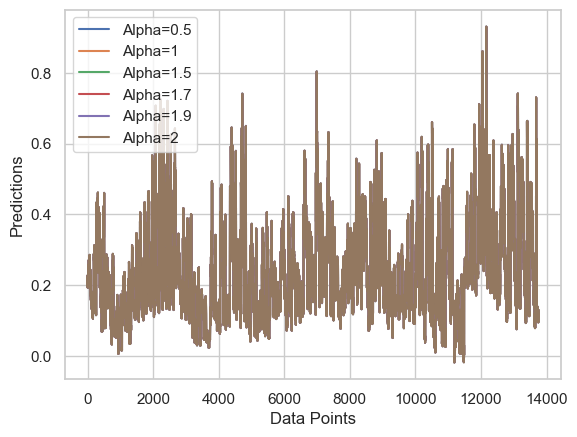

In [146]:
for alpha in alphas:
    predictions = pred[alpha]
    plt.plot(predictions, label=f'Alpha={alpha}')

plt.xlabel('Data Points')
plt.ylabel('Predictions')
plt.legend()
plt.show()

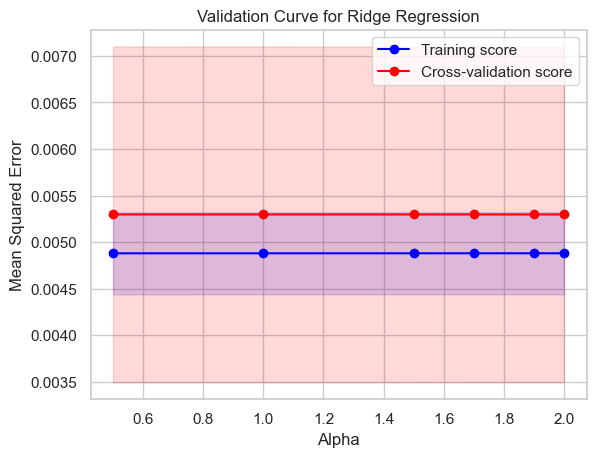

In [150]:
from sklearn.model_selection import validation_curve
param_range = alphas
train_scores, test_scores = validation_curve(
    Ridge(), X_train, y, param_name="alpha", param_range=param_range,
    scoring="neg_mean_squared_error", cv=5
)

# Calculate mean and standard deviation for training set scores
train_mean = -np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Calculate mean and standard deviation for test set scores
test_mean = -np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plotting the validation curve
plt.plot(param_range, train_mean, label="Training score", color="blue", marker='o')
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, alpha=0.15, color="blue")

plt.plot(param_range, test_mean, label="Cross-validation score", color="red", marker='o')
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, alpha=0.15, color="red")

plt.xlabel("Alpha")
plt.ylabel("Mean Squared Error")
plt.title("Validation Curve for Ridge Regression")
plt.legend()
plt.show()